In [1]:
import pandas as pd

In [2]:
hp_df = pd.read_csv('./hp_df.csv',index_col=0)

In [3]:
hp_boostrap100 = hp_df[:150]
hp_boostrap100.loc[:, 'TSS'].mean(), hp_boostrap100.loc[:, 'HSS'].mean()

(0.7541907686728822, 0.3127109798924769)

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
max_composite = pd.read_csv('./XGBoost_max_composite.csv',index_col=0)
max_TSS = pd.read_csv('./XGBoost_max_TSS.csv',index_col=0)
max_HSS = pd.read_csv('./XGBoost_max_HSS.csv',index_col=0)

In [8]:
max_composite['category'] = ''
max_TSS['category'] = ''
max_HSS['category'] = ''

for i in range(len(max_composite)):
    if 'TEp5' in max_composite['exp'][i]:
        max_composite.loc[i,'category'] = 5
        max_TSS.loc[i,'category'] = 5
        max_HSS.loc[i,'category'] = 5
    if 'TEp4' in max_composite['exp'][i]:
        max_composite.loc[i,'category'] = 4
        max_TSS.loc[i,'category'] = 4
        max_HSS.loc[i,'category'] = 4
    if 'TEp3' in max_composite['exp'][i]:
        max_composite.loc[i,'category'] = 3
        max_TSS.loc[i,'category'] = 3
        max_HSS.loc[i,'category'] = 3
    if 'TEp2' in max_composite['exp'][i]:
        max_composite.loc[i,'category'] = 2
        max_TSS.loc[i,'category'] = 2
        max_HSS.loc[i,'category'] = 2
    if 'TEp1' in max_composite['exp'][i]:
        max_composite.loc[i,'category'] = 1
        max_TSS.loc[i,'category'] = 1
        max_HSS.loc[i,'category'] = 1

<ErrorbarContainer object of 3 artists>

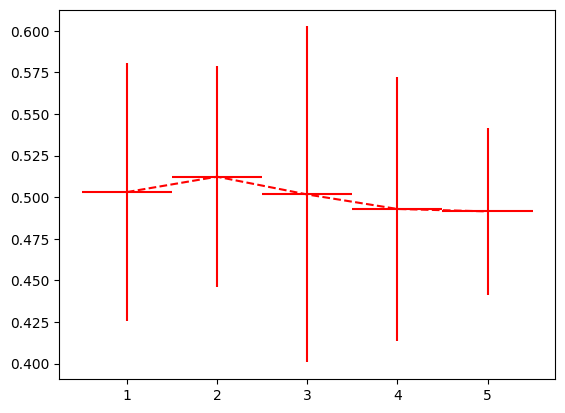

In [14]:
mean = max_composite.groupby('category')['composite_index'].mean()
std = max_composite.groupby('category')['composite_index'].std()
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std,
               linestyle='--', c='red')

In [28]:
plt.rcParams.update({'font.size': 15})

/tmp/ipykernel_12268/1814133818.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])


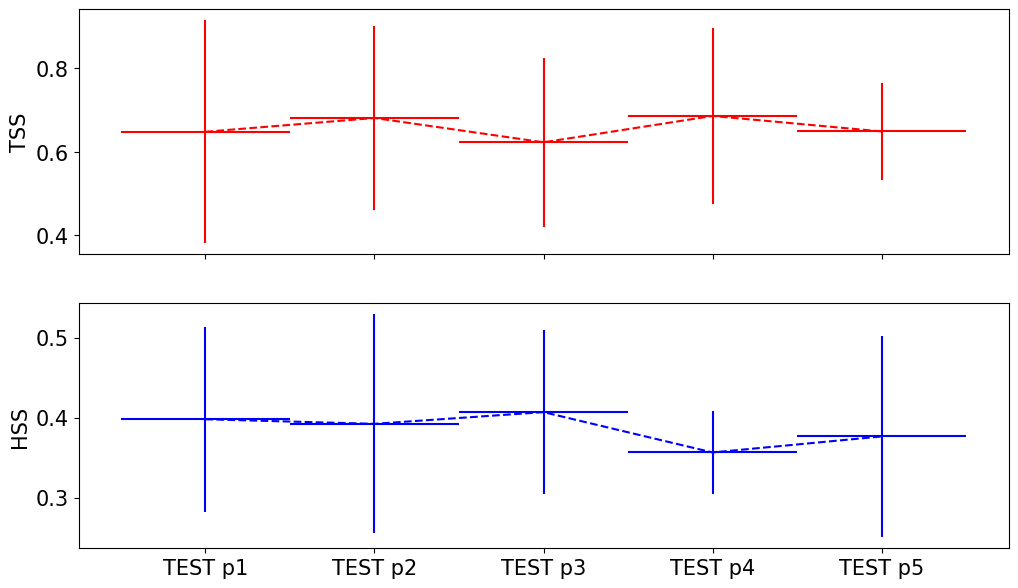

In [36]:
fig, axs = plt.subplots(2, figsize=(12, 7))
mean = max_composite.groupby('category')['TSS'].mean()
std = max_composite.groupby('category')['TSS'].std()
axs[0].errorbar(mean.index, mean, xerr=0.5, yerr=2*std,
               linestyle='--', c='red')


mean = max_composite.groupby('category')['HSS'].mean()
std = max_composite.groupby('category')['HSS'].std()
axs[1].errorbar(mean.index, mean, xerr=0.5, yerr=2*std,
               linestyle='--', c='blue')

axs[0].set(ylabel='TSS')
axs[1].set(ylabel='HSS')
axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot.pdf', bbox_inches='tight')

In [4]:
xgboost = pd.read_csv('./XGBoost_internal_CV.csv',index_col=0)
xgboost['category'] = ''

for i in range(len(xgboost)):
    if 'TEp5' in xgboost['exp'][i]:
        xgboost.loc[i,'category'] = 5
    if 'TEp4' in xgboost['exp'][i]:
        xgboost.loc[i,'category'] = 4
    if 'TEp3' in xgboost['exp'][i]:
        xgboost.loc[i,'category'] = 3
    if 'TEp2' in xgboost['exp'][i]:
        xgboost.loc[i,'category'] = 2
    if 'TEp1' in xgboost['exp'][i]:
        xgboost.loc[i,'category'] = 1

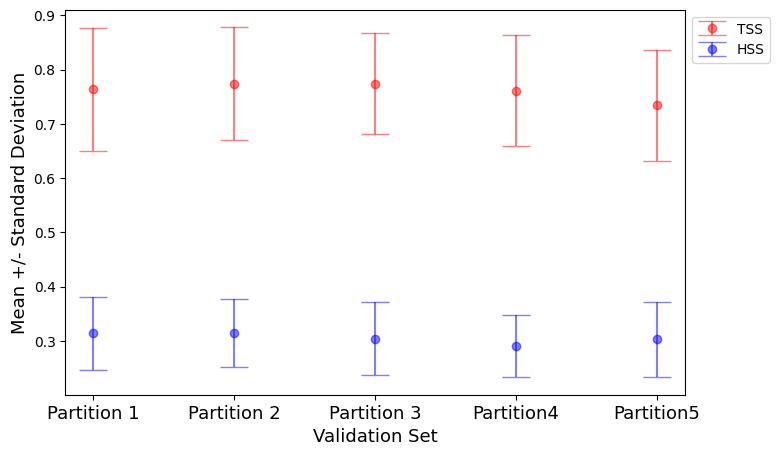

In [19]:
fig, axs = plt.subplots(figsize=(8, 5))
labels = ['Partition 1','Partition 2','Partition 3','Partition4','Partition5']
x_labels = np.arange(len(labels))

mean_TSS = xgboost.groupby('category')['TSS'].mean()
std_TSS = xgboost.groupby('category')['TSS'].std()
mean_HSS = xgboost.groupby('category')['HSS'].mean()
std_HSS = xgboost.groupby('category')['HSS'].std()

axs.errorbar(x_labels, mean_TSS, yerr=std_TSS, c='red', alpha=0.5, ecolor='red', capsize=10, fmt='o', label='TSS')
axs.errorbar(x_labels, mean_HSS, yerr=std_HSS, c='blue', alpha=0.5, ecolor='blue', capsize=10, fmt='o', label='HSS')
axs.set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs.set_xlabel('Validation Set', fontsize=13)
axs.set_xticks(x_labels)
axs.set_xticklabels(labels, fontsize=13)

# axs[0].set(ylabel='TSS')
# axs[1].set(ylabel='HSS')
axs.legend(bbox_to_anchor=(1, 1))
# axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

# for ax in axs.flat:
#     ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot.pdf', bbox_inches='tight')

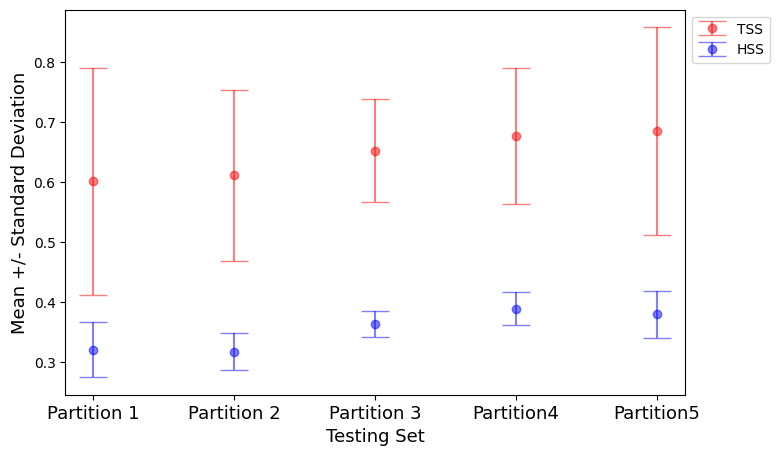

In [20]:
fig, axs = plt.subplots(figsize=(8, 5))
labels = ['Partition 1','Partition 2','Partition 3','Partition4','Partition5']
x_labels = np.arange(len(labels))

mean_TSS = xgboost.groupby('category')['Testing_TSS'].mean()
std_TSS = xgboost.groupby('category')['Testing_TSS'].std()
mean_HSS = xgboost.groupby('category')['Testing_HSS'].mean()
std_HSS = xgboost.groupby('category')['Testing_HSS'].std()

axs.errorbar(x_labels, mean_TSS, yerr=std_TSS, c='red', alpha=0.5, ecolor='red', capsize=10, fmt='o', label='TSS')
axs.errorbar(x_labels, mean_HSS, yerr=std_HSS, c='blue', alpha=0.5, ecolor='blue', capsize=10, fmt='o', label='HSS')
axs.set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs.set_xlabel('Testing Set', fontsize=13)
axs.set_xticks(x_labels)
axs.set_xticklabels(labels, fontsize=13)

# axs[0].set(ylabel='TSS')
# axs[1].set(ylabel='HSS')
axs.legend(bbox_to_anchor=(1, 1))
# axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

# for ax in axs.flat:
#     ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot_test.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot_test.pdf', bbox_inches='tight')

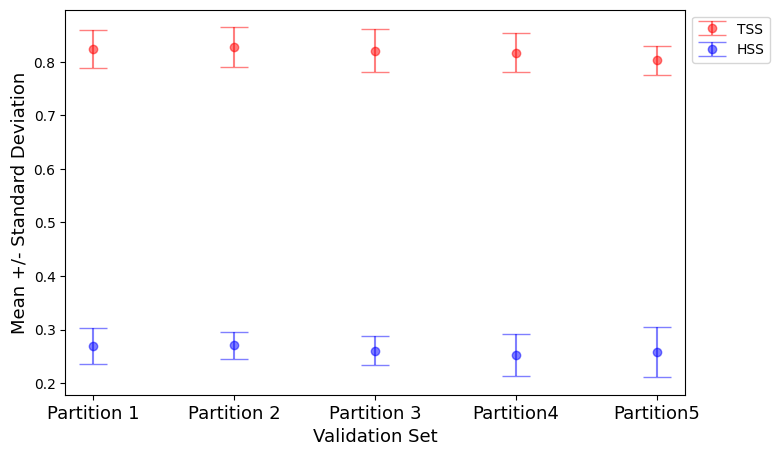

In [35]:
fig, axs = plt.subplots(figsize=(8, 5))
labels = ['Partition 1','Partition 2','Partition 3','Partition4','Partition5']
x_labels = np.arange(len(labels))

mean_TSS = max_TSS.groupby('category')['TSS'].mean()
std_TSS = max_TSS.groupby('category')['TSS'].std()
mean_HSS = max_TSS.groupby('category')['HSS'].mean()
std_HSS = max_TSS.groupby('category')['HSS'].std()

axs.errorbar(x_labels, mean_TSS, yerr=std_TSS, c='red', alpha=0.5, ecolor='red', capsize=10, fmt='o', label='TSS')
axs.errorbar(x_labels, mean_HSS, yerr=std_HSS, c='blue', alpha=0.5, ecolor='blue', capsize=10, fmt='o', label='HSS')
axs.set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs.set_xlabel('Validation Set', fontsize=13)
axs.set_xticks(x_labels)
axs.set_xticklabels(labels, fontsize=13)

# axs[0].set(ylabel='TSS')
# axs[1].set(ylabel='HSS')
axs.legend(bbox_to_anchor=(1, 1))
# axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

# for ax in axs.flat:
#     ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot_max_TSS_val.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot_max_TSS_val.pdf', bbox_inches='tight')

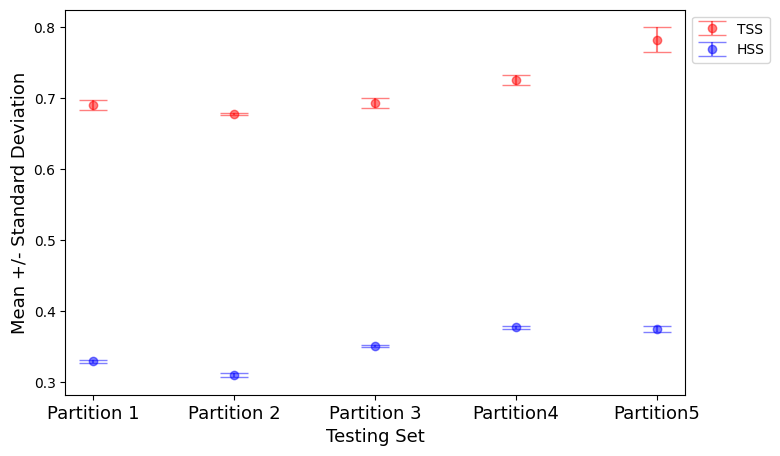

In [36]:
fig, axs = plt.subplots(figsize=(8, 5))
labels = ['Partition 1','Partition 2','Partition 3','Partition4','Partition5']
x_labels = np.arange(len(labels))

mean_TSS = max_TSS.groupby('category')['Testing_TSS'].mean()
std_TSS = max_TSS.groupby('category')['Testing_TSS'].std()
mean_HSS = max_TSS.groupby('category')['Testing_HSS'].mean()
std_HSS = max_TSS.groupby('category')['Testing_HSS'].std()

axs.errorbar(x_labels, mean_TSS, yerr=std_TSS, c='red', alpha=0.5, ecolor='red', capsize=10, fmt='o', label='TSS')
axs.errorbar(x_labels, mean_HSS, yerr=std_HSS, c='blue', alpha=0.5, ecolor='blue', capsize=10, fmt='o', label='HSS')
axs.set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs.set_xlabel('Testing Set', fontsize=13)
axs.set_xticks(x_labels)
axs.set_xticklabels(labels, fontsize=13)

# axs[0].set(ylabel='TSS')
# axs[1].set(ylabel='HSS')
axs.legend(bbox_to_anchor=(1, 1))
# axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

# for ax in axs.flat:
#     ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot_max_TSS_test.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot_max_TSS_test.pdf', bbox_inches='tight')

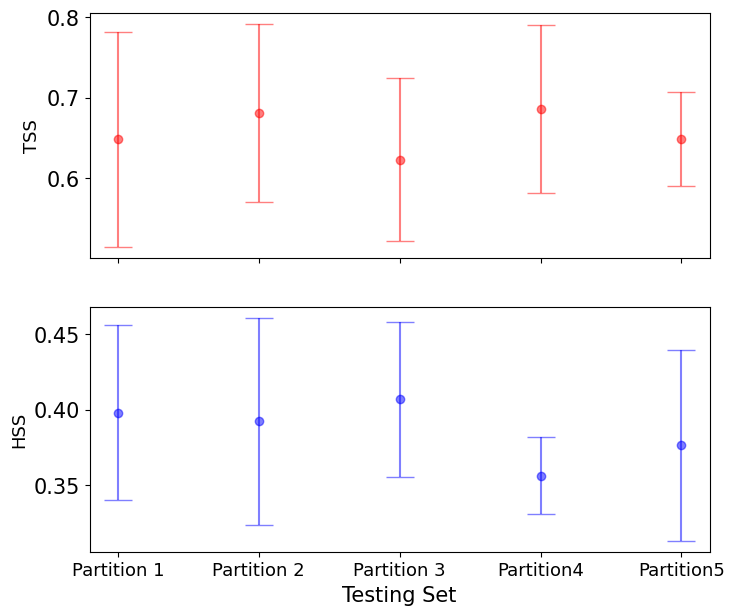

In [42]:
fig, axs = plt.subplots(2, figsize=(8, 7))
labels = ['Partition 1','Partition 2','Partition 3','Partition4','Partition5']
x_labels = np.arange(len(labels))

mean = max_composite.groupby('category')['TSS'].mean()
std = max_composite.groupby('category')['TSS'].std()
axs[0].errorbar(x_labels, mean, yerr=std, c='red', alpha=0.5, ecolor='red', capsize=10, fmt='o')
axs[0].set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs[0].set_xticks(x_labels)
axs[0].set_xticklabels(labels, fontsize=13)


mean = max_composite.groupby('category')['HSS'].mean()
std = max_composite.groupby('category')['HSS'].std()
axs[1].errorbar(x_labels, mean, yerr=std, c='blue', alpha=0.5, ecolor='blue', capsize=10, fmt='o')
axs[1].set_ylabel('Mean +/- Standard Deviation', fontsize=13)
axs[1].set_xticks(x_labels)
axs[1].set_xticklabels(labels, fontsize=13)

axs[0].set(ylabel='TSS')
axs[1].set(ylabel='HSS')
axs[1].set(xlabel='Testing Set')
# axs[1].set_xticklabels([0, 'TEST p1', 'TEST p2', 'TEST p3', 'TEST p4','TEST p5'])

for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('./plots/XGBootstrap_error_plot.png', bbox_inches='tight')
plt.savefig('./plots/XGBootstrap_error_plot.pdf', bbox_inches='tight')

In [181]:
log2_top_exp3_bs10 = pd.read_csv('./log2_TOP_exp3_bs10.csv', index_col=0)
log2_top_exp3_bs100 = pd.read_csv('./log2_TOP_exp3_bs100.csv', index_col=0)
log2_top_exp3_bs1000 = pd.read_csv('./log2_TOP_exp3_bs1000.csv', index_col=0)

In [182]:
log2_top_exp3_bs10['sum_rate_bs10'] = log2_top_exp3_bs10[['cw5','cw6','cw7','cw8','cw9','cw10','cw20','cw30']].sum(axis=1) / 100
log2_top_exp3_bs100['sum_rate_bs100'] = log2_top_exp3_bs100[['cw5','cw6','cw7','cw8','cw9','cw10','cw20','cw30']].sum(axis=1) / 1000
log2_top_exp3_bs1000['sum_rate_bs1000'] = log2_top_exp3_bs1000[['cw5','cw6','cw7','cw8','cw9','cw10','cw20','cw30']].sum(axis=1) / 10000

In [183]:
log2_top_exp3_bs10

,Features,cw5,cw6,cw7,cw8,cw9,cw10,cw20,cw30,sum_rate_bs10
0,ABSNJZH_std_mean_ws8_ss4,6,8,6,6,6,6,8,3,0.49
1,TOTUSJH_mean_slice[40:54],4,7,6,6,4,7,6,8,0.48
2,TOTUSJH_mean_slice[32:46],5,5,6,7,5,6,5,4,0.43
3,ABSNJZH_std_max_ws8_ss4,2,4,4,3,4,5,4,7,0.33
4,ABSNJZH_std_max_ws15_ss8,5,6,3,4,4,5,2,3,0.32
5,ABSNJZH_std_min_ws15_ss8,5,3,4,3,4,3,3,3,0.28
6,R_VALUE_mean_mean_ws8_ss4,3,3,3,3,4,4,1,3,0.24
7,TOTUSJH_mean_max_ws8_ss4,3,2,1,3,2,2,3,4,0.20
8,TOTUSJH_mean_slice[16:30],3,2,3,3,3,1,0,0,0.15
9,SAVNCPP_std_max_ws30_ss15,2,2,2,2,2,2,1,1,0.14


In [184]:
log2_top_exp3_bs1000

,Features,cw5,cw6,cw7,cw8,cw9,cw10,cw20,cw30,sum_rate_bs1000
0,ABSNJZH_std_mean_ws8_ss4,752,753,745,746,719,693,470,342,0.5220
1,TOTUSJH_mean_slice[40:54],524,558,580,598,618,633,674,660,0.4845
2,TOTUSJH_mean_slice[32:46],373,378,413,409,438,463,503,458,0.3435
3,ABSNJZH_std_max_ws8_ss4,356,358,358,338,334,340,339,307,0.2730
4,SAVNCPP_std_mean_ws8_ss4,373,379,363,373,372,396,267,177,0.2700
5,ABSNJZH_std_max_ws15_ss8,403,379,354,341,308,293,228,172,0.2478
6,R_VALUE_mean_mean_ws8_ss4,203,208,208,221,208,196,186,183,0.1613
7,TOTUSJH_mean_mean_ws15_ss8,164,190,213,230,235,218,185,154,0.1589
8,TOTUSJH_mean_max_ws8_ss4,118,150,170,166,186,191,260,246,0.1487
9,TOTUSJH_mean_slice[16:30],132,145,162,176,206,222,232,208,0.1483


/tmp/ipykernel_12268/1110501935.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(log2_top_exp3_bs10['Features'], fontsize=15, rotation=80)


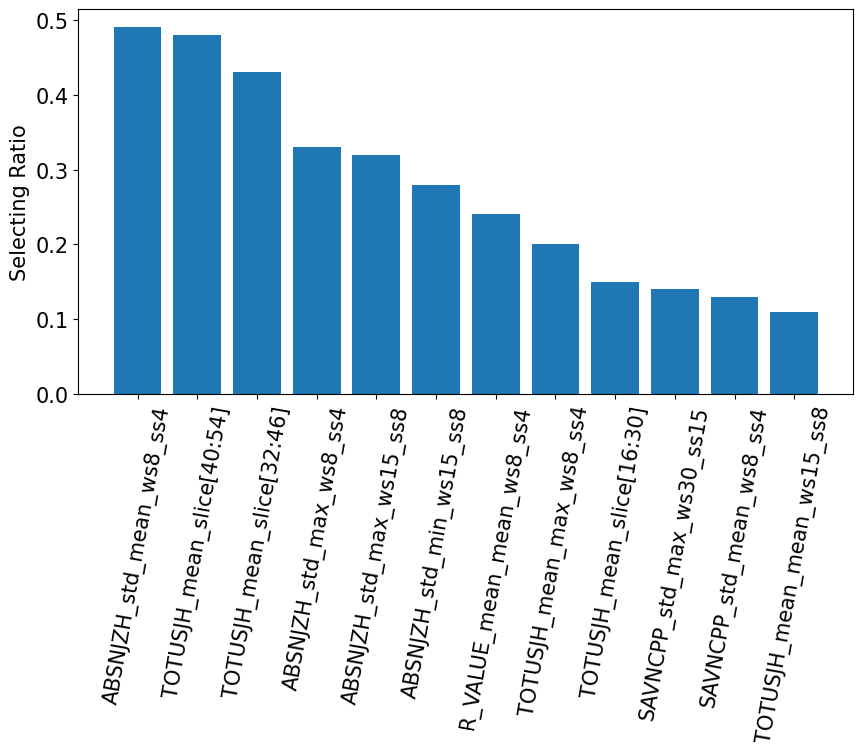

In [185]:
fig, axs = plt.subplots(figsize=(10, 5))

axs.bar(log2_top_exp3_bs10['Features'], log2_top_exp3_bs10['sum_rate_bs10'])

axs.set_ylabel('Selecting Ratio')
axs.set_xticklabels(log2_top_exp3_bs10['Features'], fontsize=15, rotation=80)

plt.savefig('./plots/Bootstrap10_Exp3_wsALL_SelectRatio.pdf', bbox_inches='tight')

/tmp/ipykernel_12268/1865789708.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(log2_top_exp3_bs100['Features'], fontsize=15, rotation=80)


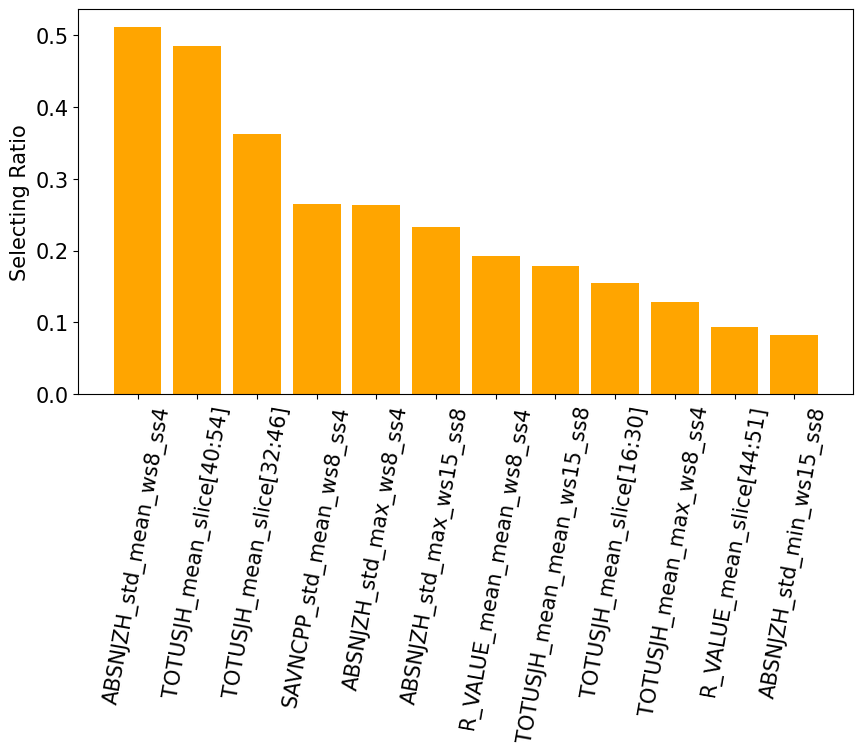

In [186]:
fig, axs = plt.subplots(figsize=(10, 5))

axs.bar(log2_top_exp3_bs100['Features'], log2_top_exp3_bs100['sum_rate_bs100'], color='orange')

axs.set_ylabel('Selecting Ratio')
axs.set_xticklabels(log2_top_exp3_bs100['Features'], fontsize=15, rotation=80)

plt.savefig('./plots/Bootstrap100_Exp3_wsALL_SelectRatio.pdf', bbox_inches='tight')

/tmp/ipykernel_12268/1108607266.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(log2_top_exp3_bs1000['Features'], fontsize=15, rotation=80)


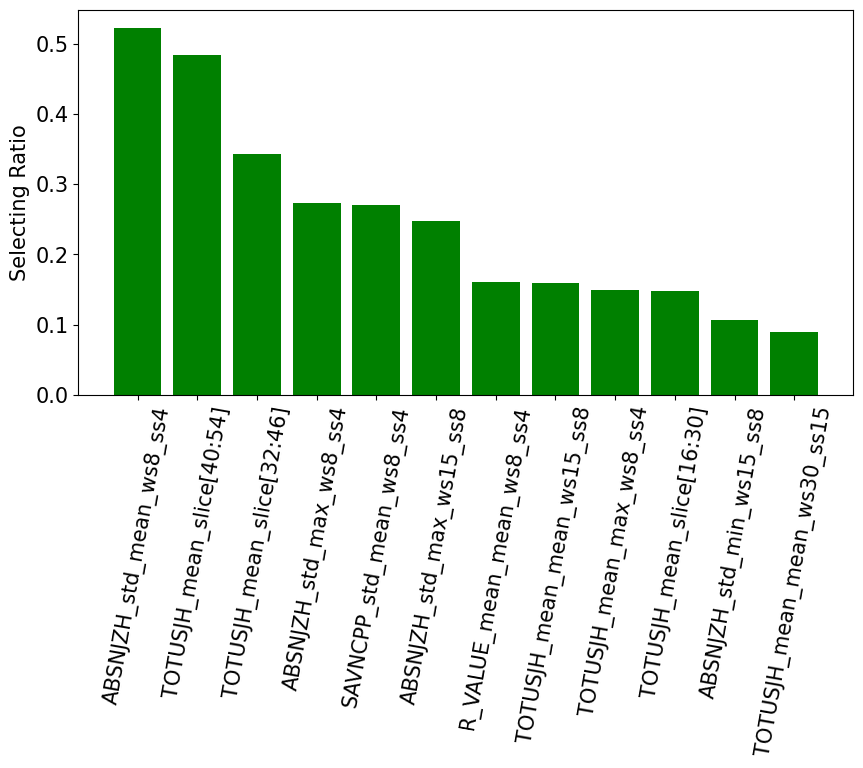

In [187]:
fig, axs = plt.subplots(figsize=(10, 5))

axs.bar(log2_top_exp3_bs1000['Features'], log2_top_exp3_bs1000['sum_rate_bs1000'], color='green')

axs.set_ylabel('Selecting Ratio')
axs.set_xticklabels(log2_top_exp3_bs1000['Features'], fontsize=15, rotation=80)

plt.savefig('./plots/Bootstrap1000_Exp3_wsALL_SelectRatio.pdf', bbox_inches='tight')

In [191]:
result = log2_top_exp3_bs10.merge(log2_top_exp3_bs100, on='Features')
result = result.merge(log2_top_exp3_bs1000, on='Features').reindex(index=result.index[::-1])
result[['Features', 'sum_rate_bs10', 'sum_rate_bs100', 'sum_rate_bs1000']]

,Features,sum_rate_bs10,sum_rate_bs100,sum_rate_bs1000
10,TOTUSJH_mean_mean_ws15_ss8,0.11,0.179,0.1589
9,SAVNCPP_std_mean_ws8_ss4,0.13,0.265,0.2700
8,TOTUSJH_mean_slice[16:30],0.15,0.155,0.1483
7,TOTUSJH_mean_max_ws8_ss4,0.20,0.129,0.1487
6,R_VALUE_mean_mean_ws8_ss4,0.24,0.193,0.1613
5,ABSNJZH_std_min_ws15_ss8,0.28,0.083,0.1064
4,ABSNJZH_std_max_ws15_ss8,0.32,0.233,0.2478
3,ABSNJZH_std_max_ws8_ss4,0.33,0.264,0.2730
2,TOTUSJH_mean_slice[32:46],0.43,0.362,0.3435
1,TOTUSJH_mean_slice[40:54],0.48,0.485,0.4845


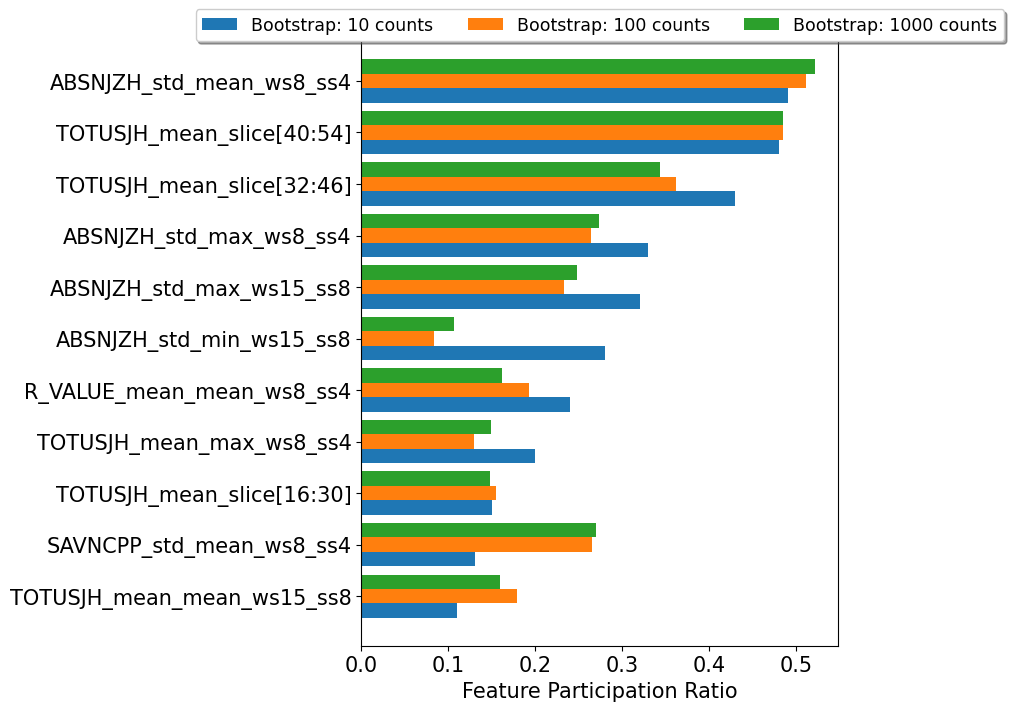

In [206]:
df = {
    'Bootstrap: 10 counts': result['sum_rate_bs10'],
    'Bootstrap: 100 counts': result['sum_rate_bs100'],
    'Bootstrap: 1000 counts': result['sum_rate_bs1000'],
}

x = np.arange(len(result['Features']))  # the label locations
width = 0.28  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 7))

for attribute, measurement in df.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Participation Ratio')
ax.set_yticks(x + width, result['Features'])
ax.legend(loc='upper center', ncols=3, fontsize=12.5, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
# ax.set_xticklabels(result['Features'], fontsize=15, rotation=80)

plt.savefig('./plots/BootstrapALL_Exp3_wsALL_SelectRatio.pdf', bbox_inches='tight')